# Bayesian Models

### 1. Bayesian Model Introduction

##### 1.1 Student model example 1

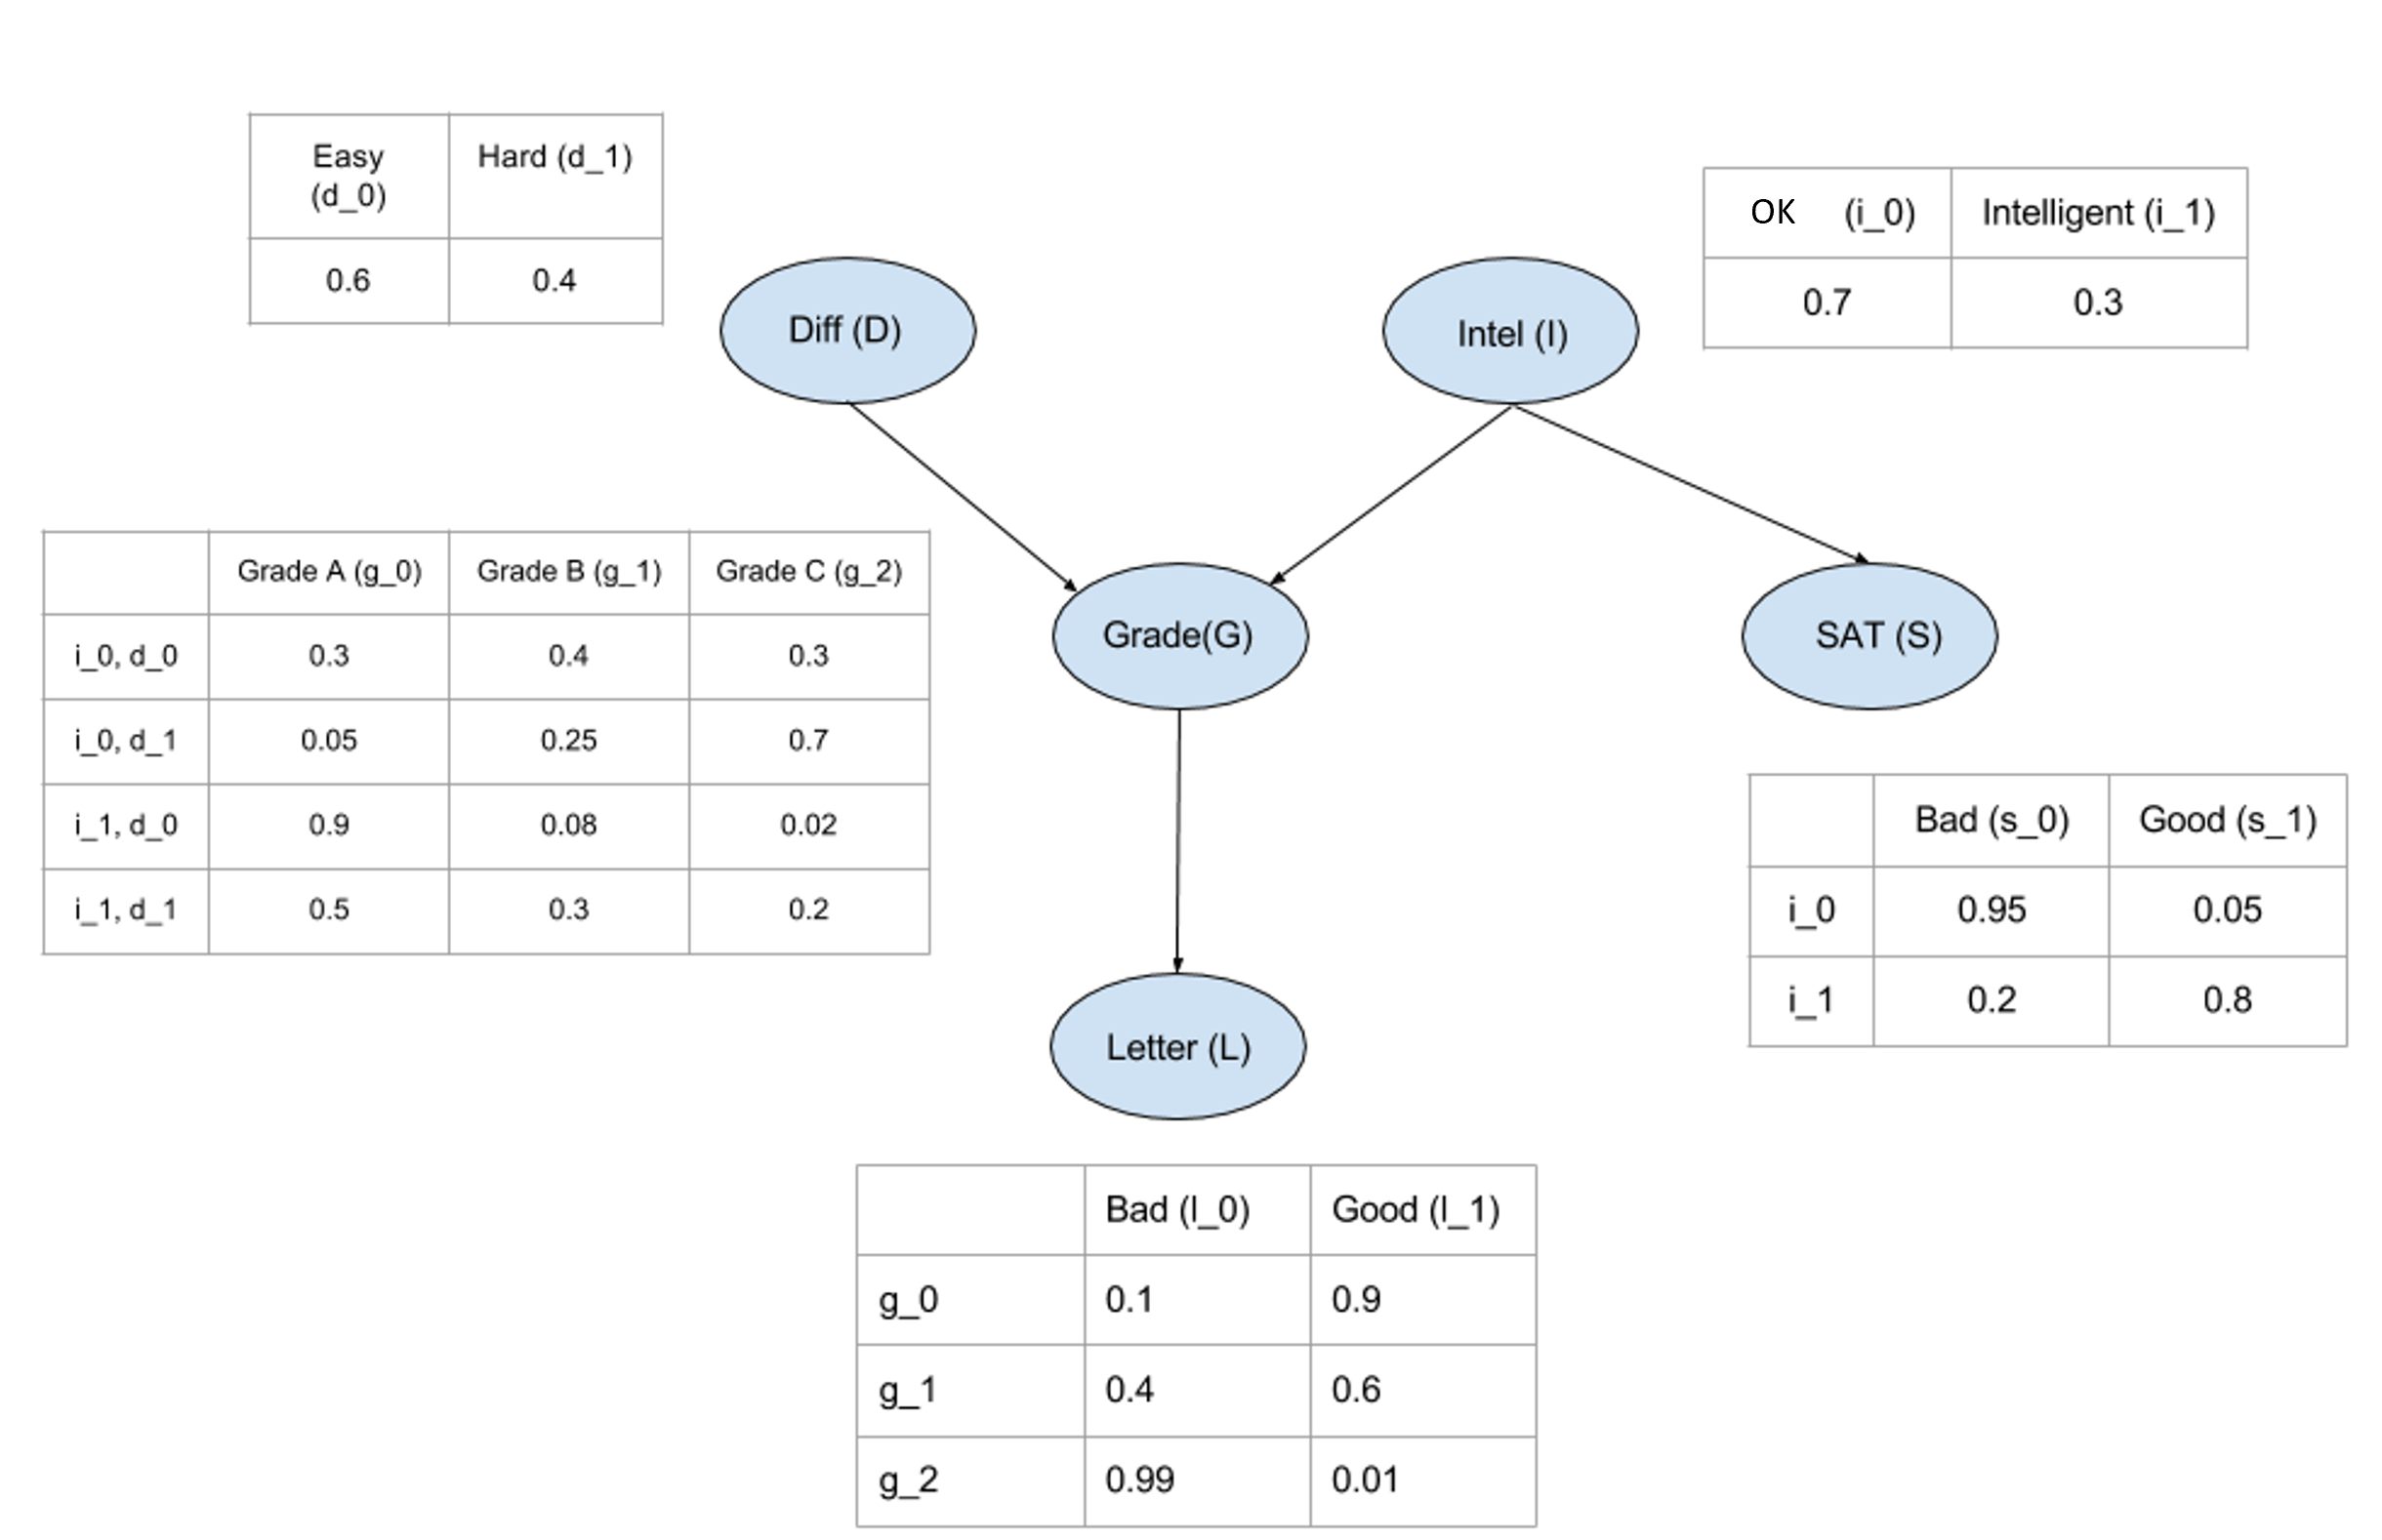

In [1]:
from IPython.display import Image

Image("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 8\\DSC 540 - Exercise 0801\\bayesian_model_images\\student_full_param2.png")

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# defining the model structure
model = BayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# defining individual CPDs
cpd_d = TabularCPD(variable = 'D', variable_card = 2, values = [[0.6], [0.4]])
print(cpd_d)

cpd_i = TabularCPD(variable = 'I', variable_card = 2, values = [[0.7], [0.3]])
print(cpd_i)

+------+-----+
| D(0) | 0.6 |
+------+-----+
| D(1) | 0.4 |
+------+-----+
+------+-----+
| I(0) | 0.7 |
+------+-----+
| I(1) | 0.3 |
+------+-----+


In [4]:
# defining individual CPDs
cpd_g = TabularCPD(variable = 'G', variable_card = 3,
                   values = [[0.30, 0.05, 0.90, 0.50],
                             [0.40, 0.25, 0.08, 0.30],
                             [0.30, 0.70, 0.02, 0.20]],
                   evidence = ['I', 'D'],
                   evidence_card = [2, 2])
print(cpd_g)

cpd_l = TabularCPD(variable = 'L', variable_card = 2,
                   values = [[0.10, 0.40, 0.99],
                             [0.90, 0.60, 0.01]],
                   evidence = ['G'],
                   evidence_card = [3])
print(cpd_l)

cpd_s = TabularCPD(variable = 'S', variable_card = 2,
                   values = [[0.95, 0.20],
                             [0.05, 0.80]],
                   evidence = ['I'],
                   evidence_card = [2])
print(cpd_s)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+
+------+------+------+------+
| G    | G(0) | G(1) | G(2) |
+------+------+------+------+
| L(0) | 0.1  | 0.4  | 0.99 |
+------+------+------+------+
| L(1) | 0.9  | 0.6  | 0.01 |
+------+------+------+------+
+------+------+------+
| I    | I(0) | I(1) |
+------+------+------+
| S(0) | 0.95 | 0.2  |
+------+------+------+
| S(1) | 0.05 | 0.8  |
+------+------+------+


In [5]:
# associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

In [6]:
# defined and sum to 1
model.check_model()

True

In [7]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x2181dcb6f10>,
 <TabularCPD representing P(I:2) at 0x2181dcb68e0>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x21845d98430>,
 <TabularCPD representing P(L:2 | G:3) at 0x21845d98400>,
 <TabularCPD representing P(S:2 | I:2) at 0x21845d98310>]

In [8]:
model.nodes()

NodeView(('D', 'G', 'I', 'L', 'S'))

In [9]:
model.edges()

OutEdgeView([('D', 'G'), ('G', 'L'), ('I', 'G'), ('I', 'S')])

In [10]:
print(model.get_cpds('G'))

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


In [11]:
model.get_cardinality()

defaultdict(int, {'D': 2, 'I': 2, 'G': 3, 'L': 2, 'S': 2})

##### 1.2 Student model example 2

In [12]:
# defining the model structure
model = BayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

In [13]:
cpd_d_sn = TabularCPD(variable = 'D',
                      variable_card = 2,
                      values = [[0.6], [0.4]],
                      state_names = {'D': ['Easy', 'Hard']})
print('\nCPD for Difficulty:\n', cpd_d_sn)

cpd_i_sn = TabularCPD(variable = 'I',
                      variable_card = 2,
                      values = [[0.7], [0.3]],
                      state_names = {'I': ['OK', 'Intelligent']})
print('\nCPD for Intelligence:\n', cpd_i_sn)

cpd_g_sn = TabularCPD(variable = 'G',
                      variable_card = 3,
                      values = [[0.30, 0.05, 0.90,  0.50],
                                [0.40, 0.25, 0.08, 0.30],
                                [0.30, 0.70,  0.02, 0.20]],
                      evidence = ['I', 'D'],
                      evidence_card = [2, 2],
                      state_names = {'G': ['A', 'B', 'C'],
                                     'I': ['OK', 'Intelligent'],
                                     'D': ['Easy', 'Hard']})
print('\nCPD for Grade:\n', cpd_g_sn)

cpd_l_sn = TabularCPD(variable = 'L',
                      variable_card = 2,
                      values = [[0.10, 0.40, 0.99],
                                [0.90, 0.60, 0.01]],
                      evidence = ['G'],
                      evidence_card = [3],
                      state_names = {'L': ['Bad', 'Good'],
                                     'G': ['A', 'B', 'C']})
print('\nCPD for Letter:\n', cpd_l_sn)

cpd_s_sn = TabularCPD(variable = 'S',
                      variable_card = 2,
                      values = [[0.95, 0.20],
                                [0.05, 0.80]],
                      evidence = ['I'],
                      evidence_card = [2],
                      state_names = {'S': ['Bad', 'Good'],
                                     'I': ['OK', 'Intelligent']})
print('\nCPD for SAT Score:\n', cpd_s_sn)


CPD for Difficulty:
 +---------+-----+
| D(Easy) | 0.6 |
+---------+-----+
| D(Hard) | 0.4 |
+---------+-----+

CPD for Intelligence:
 +----------------+-----+
| I(OK)          | 0.7 |
+----------------+-----+
| I(Intelligent) | 0.3 |
+----------------+-----+

CPD for Grade:
 +------+---------+---------+----------------+----------------+
| I    | I(OK)   | I(OK)   | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+

CPD for Letter:
 +---------+

In [14]:
# associating the CPDs with the network
model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)

In [15]:
# defined and sum to 1
model.check_model()

True

In [16]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x2181dcb6cd0>,
 <TabularCPD representing P(I:2) at 0x2181dcb6d00>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x2181dcb6070>,
 <TabularCPD representing P(L:2 | G:3) at 0x2181dcb68b0>,
 <TabularCPD representing P(S:2 | I:2) at 0x2181dcb6760>]

In [17]:
model.nodes()

NodeView(('D', 'G', 'I', 'L', 'S'))

In [18]:
model.edges()

OutEdgeView([('D', 'G'), ('G', 'L'), ('I', 'G'), ('I', 'S')])

In [19]:
print(cpd_g_sn)

+------+---------+---------+----------------+----------------+
| I    | I(OK)   | I(OK)   | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+


In [20]:
model.get_cardinality()

defaultdict(int, {'D': 2, 'I': 2, 'G': 3, 'L': 2, 'S': 2})

### 2. Independencies in Bayesian Networks

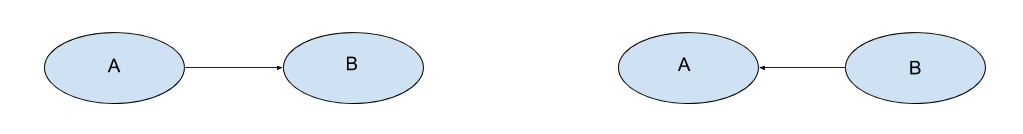

In [21]:
Image("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 8\\DSC 540 - Exercise 0801\\bayesian_model_images\\two_nodes.png")

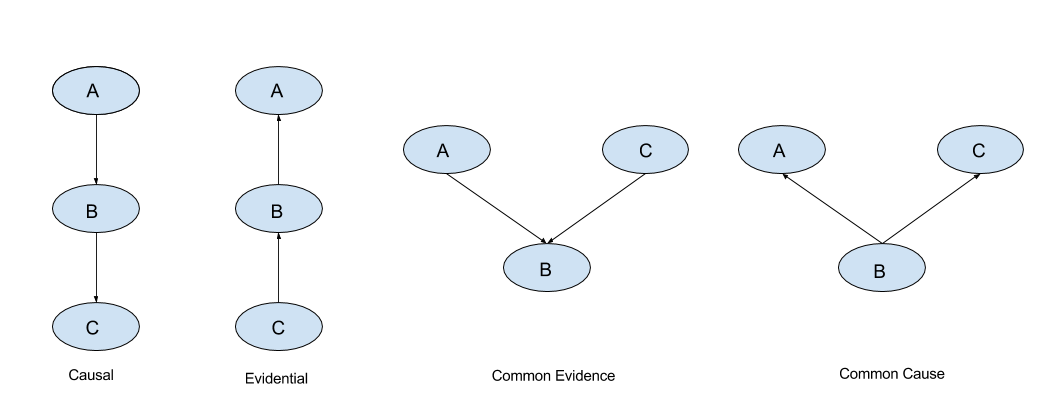

In [22]:
Image("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 8\\DSC 540 - Exercise 0801\\bayesian_model_images\\three_nodes.png")

In [23]:
# getting all the local independencies in the network
model.local_independencies(['D', 'I', 'S', 'G', 'L'])

(D ⟂ S, I)
(I ⟂ D)
(S ⟂ G, D, L | I)
(G ⟂ S | D, I)
(L ⟂ D, S, I | G)

In [24]:
model.get_independencies()

(D ⟂ S, I)
(D ⟂ L | G)
(D ⟂ I | S)
(D ⟂ S | I)
(D ⟂ L | G, S)
(D ⟂ L, S | G, I)
(D ⟂ S | L, I)
(D ⟂ S | G, L, I)
(D ⟂ L | G, S, I)
(G ⟂ S | I)
(G ⟂ S | D, I)
(G ⟂ S | L, I)
(G ⟂ S | D, L, I)
(L ⟂ D, S, I | G)
(L ⟂ S | I)
(L ⟂ S, I | G, D)
(L ⟂ D, I | G, S)
(L ⟂ D, S | G, I)
(L ⟂ S | D, I)
(L ⟂ I | G, D, S)
(L ⟂ S | G, D, I)
(L ⟂ D | G, S, I)
(S ⟂ D)
(S ⟂ L | G)
(S ⟂ G, D, L | I)
(S ⟂ L | G, D)
(S ⟂ D, L | G, I)
(S ⟂ G, L | D, I)
(S ⟂ G, D | L, I)
(S ⟂ L | G, D, I)
(S ⟂ D | G, L, I)
(S ⟂ G | D, L, I)
(I ⟂ D)
(I ⟂ L | G)
(I ⟂ D | S)
(I ⟂ L | G, D)
(I ⟂ L | G, S)
(I ⟂ L | G, D, S)

In [25]:
# getting active trail
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [26]:
model.active_trail_nodes('D', observed = 'G')

{'D': {'D', 'I', 'S'}}

### 3. Inference in Bayesian Models with Variable Elimination

In [27]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [28]:
g_dist = infer.query(['G'], show_progress = True)
print(g_dist)

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.3620 |
+------+----------+
| G(B) |   0.2884 |
+------+----------+
| G(C) |   0.3496 |
+------+----------+


In [29]:
print(infer.query(['G'], evidence = {'D': 'Easy', 'I': 'Intelligent'}))

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.9000 |
+------+----------+
| G(B) |   0.0800 |
+------+----------+
| G(C) |   0.0200 |
+------+----------+


##### 3.1 Way the difficulty of the class impact the intelligence of the student

In [30]:
print(infer.query(['I']))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.7000 |
+----------------+----------+
| I(Intelligent) |   0.3000 |
+----------------+----------+


In [31]:
print(infer.query(['I'], evidence = {'D': 'Easy'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.7000 |
+----------------+----------+
| I(Intelligent) |   0.3000 |
+----------------+----------+


In [32]:
print(infer.query(['I'], evidence = {'D': 'Hard'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.7000 |
+----------------+----------+
| I(Intelligent) |   0.3000 |
+----------------+----------+


##### 3.2 Way the difficulty of the class impact the intelligence of the student when the grade is given

In [33]:
print(infer.query(['I'], evidence = {'G': 'A'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.3867 |
+----------------+----------+
| I(Intelligent) |   0.6133 |
+----------------+----------+


In [34]:
print(infer.query(['I'], evidence = {'G': 'A', 'D': 'Easy'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.4375 |
+----------------+----------+
| I(Intelligent) |   0.5625 |
+----------------+----------+


In [35]:
print(infer.query(['I'], evidence = {'G': 'A', 'D': 'Hard'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.1892 |
+----------------+----------+
| I(Intelligent) |   0.8108 |
+----------------+----------+


In [36]:
print(infer.query(['I'], evidence = {'G': 'C'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.9211 |
+----------------+----------+
| I(Intelligent) |   0.0789 |
+----------------+----------+


In [37]:
print(infer.query(['I'], evidence = {'G': 'C', 'D': 'Easy'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.9722 |
+----------------+----------+
| I(Intelligent) |   0.0278 |
+----------------+----------+


In [38]:
print(infer.query(['I'], evidence = {'G': 'C', 'D': 'Hard'}))

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(OK)          |   0.8909 |
+----------------+----------+
| I(Intelligent) |   0.1091 |
+----------------+----------+


##### 3.3 Way the intelligence of the student impact the class difficulty when the grade is given

In [39]:
print(infer.query(['D']))

+---------+----------+
| D       |   phi(D) |
+=========+==========+
| D(Easy) |   0.6000 |
+---------+----------+
| D(Hard) |   0.4000 |
+---------+----------+


In [40]:
print(infer.query(['D'], evidence = {'G': 'A'}))

+---------+----------+
| D       |   phi(D) |
+=========+==========+
| D(Easy) |   0.7956 |
+---------+----------+
| D(Hard) |   0.2044 |
+---------+----------+


In [41]:
print(infer.query(['D'], evidence = {'G': 'A', 'I': 'Intelligent'}))

+---------+----------+
| D       |   phi(D) |
+=========+==========+
| D(Easy) |   0.7297 |
+---------+----------+
| D(Hard) |   0.2703 |
+---------+----------+


In [42]:
print(infer.query(['D'], evidence = {'G': 'A', 'I': 'OK'}))

+---------+----------+
| D       |   phi(D) |
+=========+==========+
| D(Easy) |   0.9000 |
+---------+----------+
| D(Hard) |   0.1000 |
+---------+----------+


##### 3.4 Way the grade impact the SAT score

In [43]:
print(infer.query(['S']))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.7250 |
+---------+----------+
| S(Good) |   0.2750 |
+---------+----------+


In [44]:
print(infer.query(['S'], evidence = {'G': 'C'}))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.8908 |
+---------+----------+
| S(Good) |   0.1092 |
+---------+----------+


In [45]:
print(infer.query(['S'], evidence = {'G': 'B'}))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.8189 |
+---------+----------+
| S(Good) |   0.1811 |
+---------+----------+


In [46]:
print(infer.query(['S'], evidence = {'G': 'A'}))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.4901 |
+---------+----------+
| S(Good) |   0.5099 |
+---------+----------+


##### 3.5 Way the grade impact the SAT score when the intelligence is given

In [47]:
print(infer.query(['S'], evidence = {'I': 'Intelligent'}))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.2000 |
+---------+----------+
| S(Good) |   0.8000 |
+---------+----------+


In [48]:
print(infer.query(['S'], evidence = {'I': 'Intelligent', 'G': 'B'}))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.2000 |
+---------+----------+
| S(Good) |   0.8000 |
+---------+----------+


In [49]:
print(infer.query(['S'], evidence = {'I': 'Intelligent', 'G': 'A'}))

+---------+----------+
| S       |   phi(S) |
+=========+==========+
| S(Bad)  |   0.2000 |
+---------+----------+
| S(Good) |   0.8000 |
+---------+----------+


### 4. Predicting Values from New Data Points

In [50]:
infer.map_query(['G'])

Eliminating: I: 100%|██████████| 2/2 [00:00<00:00, 400.79it/s]


{'G': 'A'}

In [51]:
infer.map_query(['G'], evidence = {'D': 'Easy', 'I': 'Intelligent'})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'G': 'A'}

In [52]:
infer.map_query(['G'], evidence = {'D': 'Hard', 'I': 'Intelligent', 'L': 'Bad', 'S': 'Good'})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'G': 'C'}